# Training CNN for the Movement Recognition task, observation trials

In this notebook, we train CNNs on the movement recognition when the subject observes the task, using PyTorch.

### Import librairies

In [1]:
from utils import *
from dataset import *
from constants import *

import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

from dataset import Participant
from models.DeepModels import *
from models.DeepUtils import *

# Reproducibility
seed_num = RANDOM_STATE # This seed will be used for all random number generators
torch.use_deterministic_algorithms(True) # PyTorch will use deterministic algorithms fro operations with stochastic behavior like dropout
random.seed(seed_num) # Python's random will use seed_num
np.random.seed(seed_num) # NumPy's random number generator will use seed_num
torch.manual_seed(seed_num) # PyTorch's random number will use seed_num

### Data loading

Change here the participant to load.

In [2]:
use_saved = True
part_name = 's6'

In [3]:
if use_saved and os.path.exists(f'saved/{part_name}.pkl'):
    participant = Participant.load_from_pickle(f'saved/{part_name}.pkl')
else:
    participant = Participant(part_name, data_path=DATA_PATH_NOTEBOOK, alpha=0.05)
    saved_dir = os.path.join(os.getcwd(), 'saved')
    if not os.path.exists(saved_dir):
        os.makedirs(saved_dir)
    with open(f'saved/{part_name}.pkl', 'wb') as f:
        pickle.dump(participant, f, pickle.HIGHEST_PROTOCOL)

## 2D convolutional network

The 2D convolutional network treats the signals' timepoints as pixels of an image.

In [4]:
channels = participant.relevant_channels_obs
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'O':
            signals.append([trial.get_signal()[channels_id, :]])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 1, 51, 1500])


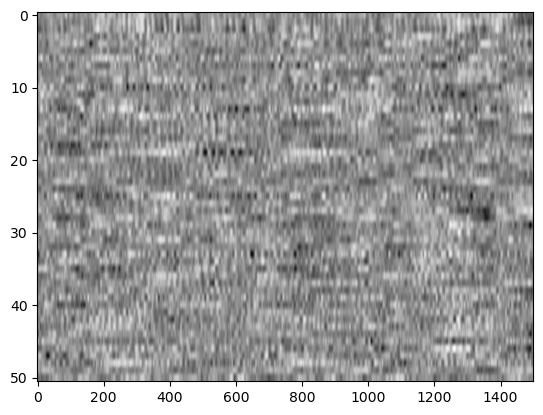

In [5]:
plt.imshow(signals[0][0], cmap='Greys', aspect='auto')

### Dataset preparation

In [6]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [7]:
model = CNN2D(signals.shape[1], 2, height=signals.shape[2], layers=(32, 16),
    width=signals.shape[3], channels=(2, 4), paddings=(1, 1),
    strides=(3, 3), convkernels=(5, 3), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [8]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training:   0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 86.94it/s]


Epoch: 1 	Training Loss: 0.696438 	Training Acc: 0.509804


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 415.89it/s]


Epoch: 1 	Validation Loss: 0.699578 	Validation Acc: 0.461538


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 64.98it/s]


Epoch: 2 	Training Loss: 0.677264 	Training Acc: 0.509804


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 416.88it/s]


Epoch: 2 	Validation Loss: 0.695525 	Validation Acc: 0.461538


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 105.81it/s]


Epoch: 3 	Training Loss: 0.677267 	Training Acc: 0.509804


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 400.08it/s]


Epoch: 3 	Validation Loss: 0.694107 	Validation Acc: 0.461538


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 81.52it/s]


Epoch: 4 	Training Loss: 0.676463 	Training Acc: 0.529412


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 757.49it/s]


Epoch: 4 	Validation Loss: 0.691195 	Validation Acc: 0.461538


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 102.72it/s]


Epoch: 5 	Training Loss: 0.676303 	Training Acc: 0.617647


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 549.43it/s]


Epoch: 5 	Validation Loss: 0.689883 	Validation Acc: 0.423077


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 84.91it/s]


Epoch: 6 	Training Loss: 0.673073 	Training Acc: 0.735294


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 1814.48it/s]


Epoch: 6 	Validation Loss: 0.687036 	Validation Acc: 0.615385


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 102.46it/s]


Epoch: 7 	Training Loss: 0.666649 	Training Acc: 0.892157


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 429.86it/s]


Epoch: 7 	Validation Loss: 0.688539 	Validation Acc: 0.538462


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 114.03it/s]


Epoch: 8 	Training Loss: 0.655145 	Training Acc: 0.892157


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 497.98it/s]


Epoch: 8 	Validation Loss: 0.670553 	Validation Acc: 0.692308


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 106.53it/s]


Epoch: 9 	Training Loss: 0.631056 	Training Acc: 0.911765


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 874.28it/s]


Epoch: 9 	Validation Loss: 0.653996 	Validation Acc: 0.807692


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 113.40it/s]


Epoch: 10 	Training Loss: 0.590434 	Training Acc: 0.882353


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 653.20it/s]

Epoch: 10 	Validation Loss: 0.628237 	Validation Acc: 0.769231


0.6282372153722323

## 1D convolutional network

1D convolutional network treats the signal as it is, that is, a timeserie.

In [9]:
channels = participant.relevant_channels_both
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'E':
            signals.append(trial.get_signal()[channels_id, :])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 40, 1500])


### Dataset preparation

In [10]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [11]:
model = CNN1D(signals.shape[1], 2, length=signals.shape[2],
    channels=(8, 16), paddings=(1, 1), strides=(5, 5), convkernels=(10, 50), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [12]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 119.80it/s]


Epoch: 1 	Training Loss: 0.683150 	Training Acc: 0.519608


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<?, ?it/s]


Epoch: 1 	Validation Loss: 0.647379 	Validation Acc: 0.615385


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 101.70it/s]


Epoch: 2 	Training Loss: 0.510252 	Training Acc: 0.862745


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 322.28it/s]


Epoch: 2 	Validation Loss: 0.481326 	Validation Acc: 0.769231


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 188.16it/s]


Epoch: 3 	Training Loss: 0.178269 	Training Acc: 1.000000


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 448.08it/s]


Epoch: 3 	Validation Loss: 0.179610 	Validation Acc: 0.923077


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 132.71it/s]


Epoch: 4 	Training Loss: 0.026194 	Training Acc: 1.000000


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.97it/s]


Epoch: 4 	Validation Loss: 0.266794 	Validation Acc: 0.807692


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 160.20it/s]


Epoch: 5 	Training Loss: 0.004749 	Training Acc: 1.000000


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 499.88it/s]


Epoch: 5 	Validation Loss: 0.136884 	Validation Acc: 1.000000


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 147.74it/s]


Epoch: 6 	Training Loss: 0.002400 	Training Acc: 1.000000


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 622.18it/s]


Epoch: 6 	Validation Loss: 0.145699 	Validation Acc: 0.923077


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 175.95it/s]


Epoch: 7 	Training Loss: 0.001861 	Training Acc: 1.000000


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 448.03it/s]


Epoch: 7 	Validation Loss: 0.158459 	Validation Acc: 0.884615


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 174.13it/s]


Epoch: 8 	Training Loss: 0.000819 	Training Acc: 1.000000


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 424.02it/s]


Epoch: 8 	Validation Loss: 0.151878 	Validation Acc: 0.923077


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 168.89it/s]


Epoch: 9 	Training Loss: 0.000566 	Training Acc: 1.000000


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 301.08it/s]


Epoch: 9 	Validation Loss: 0.173515 	Validation Acc: 0.884615


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 144.69it/s]


Epoch: 10 	Training Loss: 0.000561 	Training Acc: 1.000000


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 663.33it/s]

Epoch: 10 	Validation Loss: 0.171480 	Validation Acc: 0.884615


0.171479842124077